# Diabetes Prediction Using different neural network models

This notebook builds models using a basic MLP Neural network, CNN and ResNet. It also uses SHAP to examine feature importance

### First Import relevant files, import data, fit a basic MLP model and look at stats

In [ ]:
import sys
import os
import pandas as pd

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers, Input, models
import shap
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes_coursera.csv')

scaler = StandardScaler()

##########################################################################

X = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#MLP) model
mlp = tf.keras.Sequential([
    layers.Dense(64, activation='sigmoid'), 
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(64, activation = 'sigmoid'),
    layers.Dropout(.3),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])


mlp.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# evaluate the model
y_pred_prob = mlp.predict(X_test)

#convert y data
y_pred = (y_pred_prob > 0.5).astype(int)


print(classification_report(y_test, y_pred, digits=4))

Epoch 1/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 737us/step - loss: 0.6020 - recall: 0.6958
Epoch 2/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - loss: 0.5230 - recall: 0.8009
Epoch 3/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - loss: 0.5160 - recall: 0.7985
Epoch 4/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 0.5118 - recall: 0.8048
Epoch 5/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 0.5126 - recall: 0.7956
Epoch 6/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 0.5129 - recall: 0.8026
Epoch 7/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - loss: 0.5089 - recall: 0.8036
Epoch 8/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 0.5109 - recall: 0.7990
Epoch 9/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 0.5080 - recall: 0.8050
Epoch 10/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - loss: 0.5067 - recall: 0.7985
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
              precision    recall  f1-score   support

         0.0     0.80

### Build CNN model

In [50]:
#convolutional neural net model
cnn = tf.keras.Sequential([
    layers.Conv1D(64, 3, activation='sigmoid', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, 3, activation='sigmoid'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])

cnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

#evaluate
y_pred_prob = cnn.predict(X_test)
#convert y data
y_pred = (y_pred_prob > 0.5).astype(int)


print(classification_report(y_test, y_pred, digits=4))

Epoch 1/10


C:\Users\scd\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1768/1768 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6300 - recall: 0.6236
Epoch 2/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5363 - recall: 0.7607
Epoch 3/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5286 - recall: 0.7692
Epoch 4/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5290 - recall: 0.7709
Epoch 5/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5260 - recall: 0.7731
Epoch 6/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5261 - recall: 0.7727
Epoch 7/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5257 - recall: 0.7768
Epoch 8/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5243 - recall: 0.7773
Epoch 9/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5209 - recall: 0.7758
Epoch 10/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5210 - recall: 0.7791
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

         0.0     0.7925    0.6533    0.7162      7090


### Build ResNet model

In [62]:
def residual_block(input_tensor, filters, kernel_size=3):
    x = layers.Conv1D(filters, kernel_size, padding='same', activation='sigmoid')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters, kernel_size, padding='same', activation='sigmoid')(x)
    x = layers.BatchNormalization()(x)
    # Add shortcut (skip connection)
    shortcut = layers.Conv1D(filters, 1, padding='same')(input_tensor)
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

# resnet model
input_layer = Input(shape=(X_train.shape[1], 1))
x = residual_block(input_layer, 32)
x = layers.MaxPooling1D(pool_size=2)(x)
x = residual_block(x, 64)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='sigmoid')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)


resnet_model = models.Model(inputs=input_layer, outputs=output_layer)
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])


resnet_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# evaluate
y_pred_prob = resnet_model.predict(X_test)
#convert the y data
y_pred = (y_pred_prob > 0.5).astype(int)


print(classification_report(y_test, y_pred, digits=4))

Epoch 1/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.5394 - recall: 0.7707
Epoch 2/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5103 - recall: 0.7994
Epoch 3/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5131 - recall: 0.7982
Epoch 4/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5075 - recall: 0.8063
Epoch 5/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5066 - recall: 0.8021
Epoch 6/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5091 - recall: 0.7996
Epoch 7/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5066 - recall: 0.8025
Epoch 8/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5060 - recall: 0.7983
Epoch 9/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5044 - recall: 0.8033
Epoch 10/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5036 - recall: 0.7977
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

         0.0     0.8119    0.6539    0.724

### Run the SHAP algorithm to see feature importance

Scroll all the way below the printout to see the bar chart

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
50/50 ━━━━━━━━━━━━

PermutationExplainer explainer:  18%|██████████▌                                                | 9/50 [00:00<?, ?it/s]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


PermutationExplainer explainer:  22%|███████████                                       | 11/50 [00:12<00:22,  1.74it/s]

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step


PermutationExplainer explainer:  24%|████████████                                      | 12/50 [00:13<00:32,  1.18it/s]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step


PermutationExplainer explainer:  26%|█████████████                                     | 13/50 [00:15<00:38,  1.04s/it]

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


PermutationExplainer explainer:  28%|██████████████                                    | 14/50 [00:16<00:41,  1.15s/it]

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


PermutationExplainer explainer:  30%|███████████████                                   | 15/50 [00:17<00:42,  1.21s/it]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


PermutationExplainer explainer:  32%|████████████████                                  | 16/50 [00:19<00:42,  1.24s/it]

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  34%|█████████████████                                 | 17/50 [00:20<00:41,  1.25s/it]

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


PermutationExplainer explainer:  36%|██████████████████                                | 18/50 [00:21<00:40,  1.27s/it]

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step


PermutationExplainer explainer:  38%|███████████████████                               | 19/50 [00:22<00:39,  1.28s/it]

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


PermutationExplainer explainer:  40%|████████████████████                              | 20/50 [00:24<00:37,  1.25s/it]

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


PermutationExplainer explainer:  42%|█████████████████████                             | 21/50 [00:25<00:36,  1.28s/it]

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


PermutationExplainer explainer:  44%|██████████████████████                            | 22/50 [00:26<00:36,  1.30s/it]

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


PermutationExplainer explainer:  46%|███████████████████████                           | 23/50 [00:28<00:35,  1.31s/it]

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


PermutationExplainer explainer:  48%|████████████████████████                          | 24/50 [00:29<00:34,  1.32s/it]

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


PermutationExplainer explainer:  50%|█████████████████████████                         | 25/50 [00:30<00:32,  1.29s/it]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


PermutationExplainer explainer:  52%|██████████████████████████                        | 26/50 [00:31<00:30,  1.29s/it]

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


PermutationExplainer explainer:  54%|███████████████████████████                       | 27/50 [00:33<00:29,  1.28s/it]

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


PermutationExplainer explainer:  56%|████████████████████████████                      | 28/50 [00:34<00:27,  1.26s/it]

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step


PermutationExplainer explainer:  58%|████████████████████████████▉                     | 29/50 [00:35<00:26,  1.26s/it]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step


PermutationExplainer explainer:  60%|██████████████████████████████                    | 30/50 [00:36<00:25,  1.26s/it]

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


PermutationExplainer explainer:  62%|███████████████████████████████                   | 31/50 [00:38<00:24,  1.27s/it]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


PermutationExplainer explainer:  64%|████████████████████████████████                  | 32/50 [00:39<00:22,  1.26s/it]

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


PermutationExplainer explainer:  66%|█████████████████████████████████                 | 33/50 [00:40<00:21,  1.28s/it]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step


PermutationExplainer explainer:  68%|██████████████████████████████████                | 34/50 [00:42<00:20,  1.27s/it]

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


PermutationExplainer explainer:  70%|███████████████████████████████████               | 35/50 [00:43<00:18,  1.27s/it]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step


PermutationExplainer explainer:  72%|████████████████████████████████████              | 36/50 [00:44<00:17,  1.25s/it]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


PermutationExplainer explainer:  74%|█████████████████████████████████████             | 37/50 [00:45<00:16,  1.25s/it]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


PermutationExplainer explainer:  76%|██████████████████████████████████████            | 38/50 [00:47<00:14,  1.25s/it]

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step


PermutationExplainer explainer:  78%|███████████████████████████████████████           | 39/50 [00:48<00:13,  1.25s/it]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step


PermutationExplainer explainer:  80%|████████████████████████████████████████          | 40/50 [00:49<00:12,  1.23s/it]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


PermutationExplainer explainer:  82%|█████████████████████████████████████████         | 41/50 [00:51<00:12,  1.35s/it]

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


PermutationExplainer explainer:  84%|██████████████████████████████████████████        | 42/50 [00:52<00:10,  1.33s/it]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


PermutationExplainer explainer:  86%|███████████████████████████████████████████       | 43/50 [00:53<00:09,  1.35s/it]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


PermutationExplainer explainer:  88%|████████████████████████████████████████████      | 44/50 [00:55<00:07,  1.32s/it]

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


PermutationExplainer explainer:  90%|█████████████████████████████████████████████     | 45/50 [00:56<00:06,  1.28s/it]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step


PermutationExplainer explainer:  92%|██████████████████████████████████████████████    | 46/50 [00:57<00:05,  1.27s/it]

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


PermutationExplainer explainer:  94%|███████████████████████████████████████████████   | 47/50 [00:58<00:03,  1.32s/it]

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


PermutationExplainer explainer:  96%|████████████████████████████████████████████████  | 48/50 [01:00<00:02,  1.31s/it]

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step


PermutationExplainer explainer:  98%|█████████████████████████████████████████████████ | 49/50 [01:01<00:01,  1.31s/it]

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


PermutationExplainer explainer: 100%|██████████████████████████████████████████████████| 50/50 [01:02<00:00,  1.34s/it]

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer: 51it [01:04,  1.53s/it]                                                                


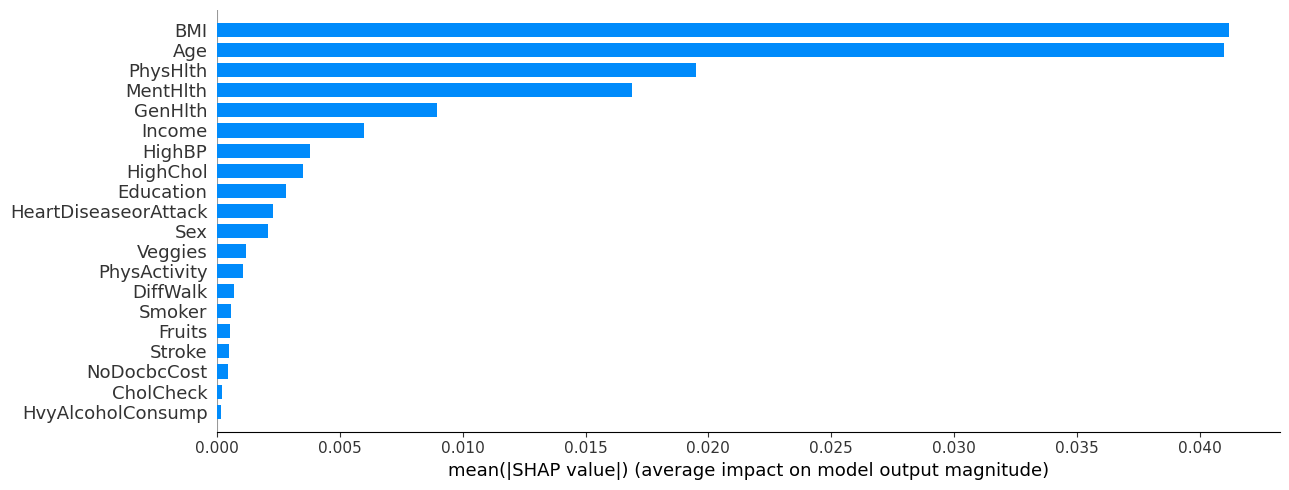

In [58]:
column_names = X.columns  

# Convert X_test_nn to dataframe 
X_test_nn_df = pd.DataFrame(X_test, columns=column_names)

# initialize SHAP and run the explainer
shap.initjs()
explainer = shap.explainers.Permutation(mlp.predict, X_test_nn_df)
shap_values = explainer(X_test_nn_df[:50])

# plot SHAP 
shap.summary_plot(shap_values, plot_type='bar', feature_names=X.columns, max_display=20, plot_size=[13, 5])

<Axes: >

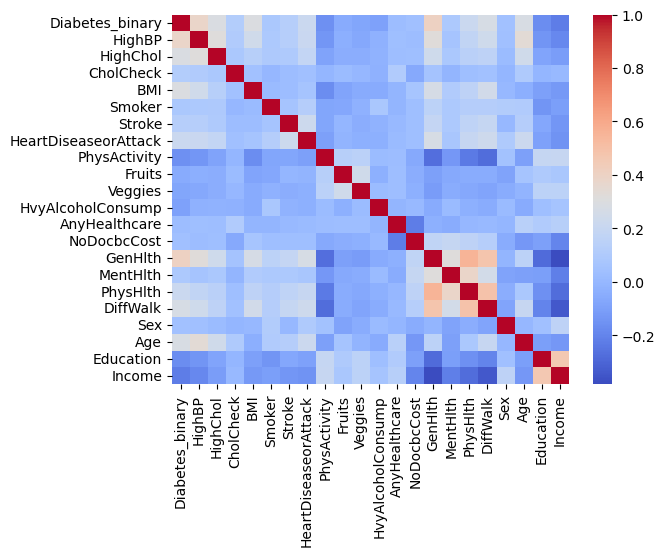

In [60]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

### See the [PDF Report](deep_learning_report.pdf) for detailed conclusions of all deep learning models